# IMG CLF

In [2]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    814      0 --:--:-- --:--:-- --:--:--   812
Updating fastai...
Done.


In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
!mkdir clean beard

In [ ]:
!mv clean.csv clean/ ; mv beard.csv beard/

In [ ]:
folder_clean = 'clean'
folder_beard = 'beard'
file_clean = 'clean.csv'
file_beard = 'beard.csv'
main_path = Path('/content/')
dest_clean = main_path/folder_clean
dest_beard = main_path/folder_beard

dest_clean.mkdir(exist_ok=True)
dest_beard.mkdir(exist_ok=True)

In [ ]:
download_images(dest_clean/file_clean, dest_clean)

In [ ]:
download_images(dest_beard/file_beard, dest_beard)

In [ ]:
!tar -cvzf beard.tgz beard

In [ ]:
!tar -czf clean.tgz clean

In [ ]:
tmp_path = Path('/content/extra')

In [ ]:
download_images('/handsome.csv', tmp_path)

In [ ]:
!tar -czf extra.tgz extra

In [ ]:
data_path = Path('/content/data')

In [5]:
data_path.ls()

[PosixPath('/content/data/face_beard'),
 PosixPath('/content/data/face_clean'),
 PosixPath('/content/data/cleaned.csv'),
 PosixPath('/content/data/models')]

In [ ]:
classes = ['face_beard', 'face_clean']

In [ ]:
for c in classes:
    print(c)
    verify_images(data_path/c, delete=True)

In [ ]:
# Make DataBunch and set seed for deterministic valid set
np.random.seed(42)
data = ImageDataBunch.from_folder(data_path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['face_beard', 'face_clean']

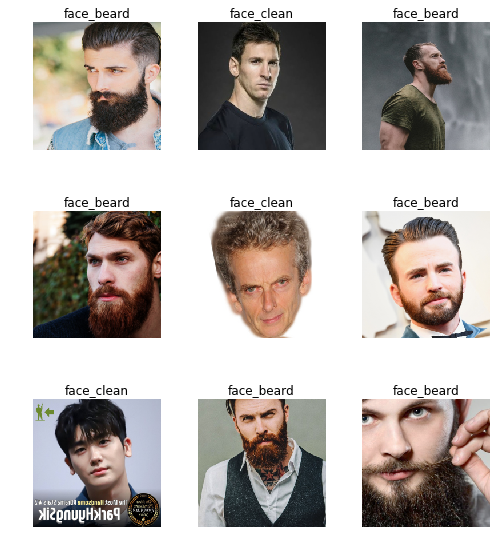

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [10]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 456, 114)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.808296,0.463932,0.254386,00:12
1,0.560252,0.293977,0.149123,00:12
2,0.468541,0.285522,0.140351,00:12
3,0.401327,0.267614,0.140351,00:12


In [ ]:
learn.save('face-stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


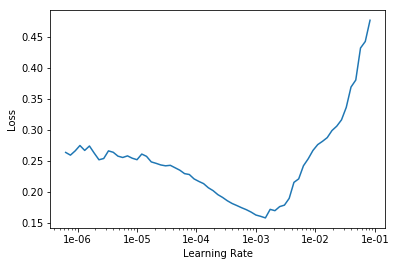

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-4, 3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.302403,0.349456,0.078947,00:12
1,0.305986,0.245291,0.061404,00:13


In [ ]:
learn.save('face-stage-2')

In [13]:
learn.load('face-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (456 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
face_beard,face_beard,face_beard,face_beard,face_beard
Path: /content/data;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
face_clean,face_beard,face_beard,face_clean,face_clean
Path: /content/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

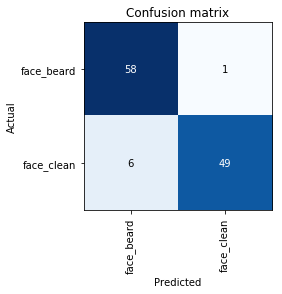

In [15]:
interp.plot_confusion_matrix()

In [16]:
interp.top_losses()

torch.return_types.topk(...)

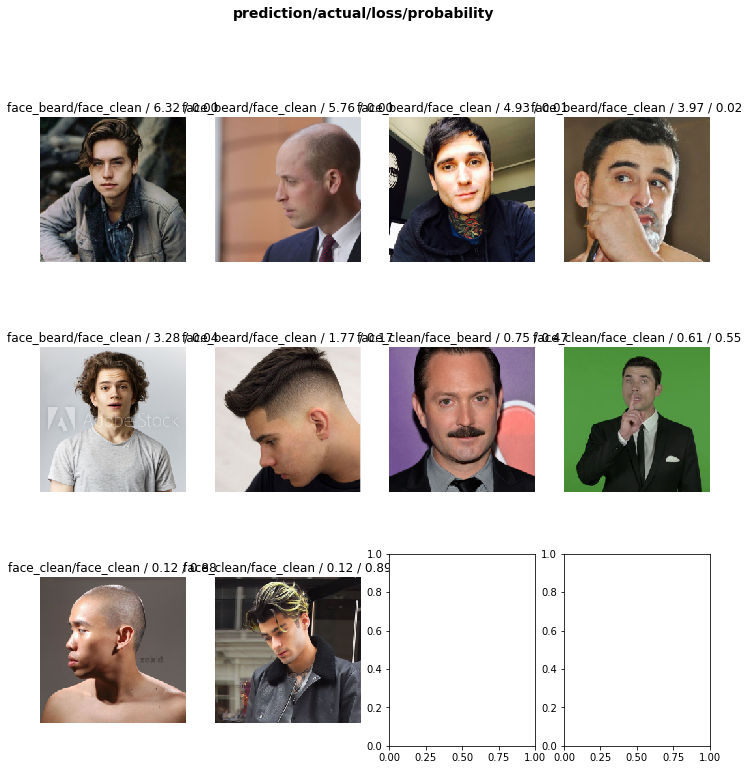

In [17]:
interp.plot_top_losses(10)

from fastai.widgets import *
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=5, ds_type=DatasetType.Valid)
ImageCleaner(ds, idxs, data_path)

In [ ]:
sample_train = open_image(data_path/'face_beard'/'00000001.jpg')

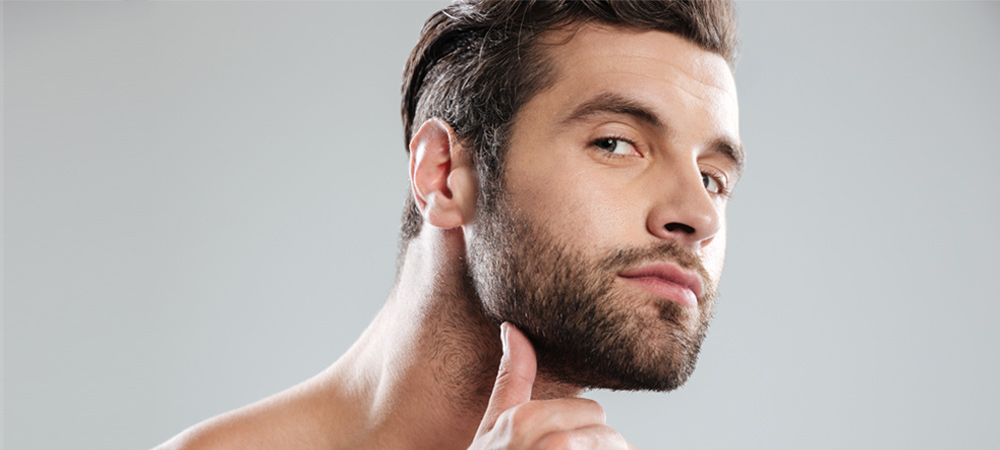

In [21]:
sample_train

In [ ]:
pred_class, pred_idx, outputs = learn.predict(sample_train)

In [23]:
pred_class, pred_idx, outputs

(Category face_beard, tensor(0), tensor([9.9997e-01, 3.3147e-05]))

In [ ]:
file_image = open('data/face_beard/00000001.jpg', 'rb')

In [40]:
file_image.__class__

_io.BufferedReader

In [ ]:
bytes_image = file_image.read()

In [43]:
bytes_image.__class__

bytes

In [44]:
bytearray(bytes_image).__class__

bytearray

In [46]:
io.BytesIO(bytes_image).__class__

_io.BytesIO

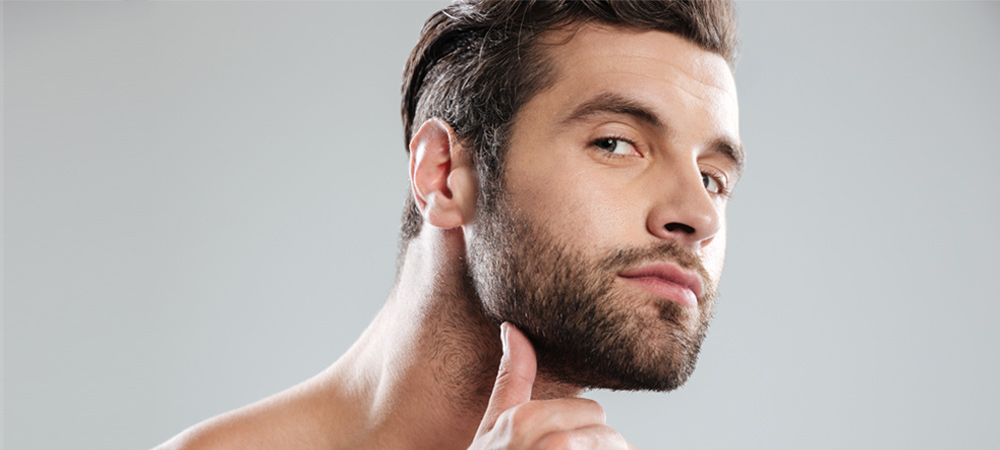

In [47]:
open_image(io.BytesIO(bytes_image))

In [24]:
sorted(
    zip(learn.data.classes, map(float, outputs)),
    key=lambda p: p[1],
    reverse=True
    )

[('face_beard', 0.9999668598175049), ('face_clean', 3.314679634058848e-05)]